<a href="https://colab.research.google.com/github/tinatrinh8/Text-Classification/blob/main/CSI4106_%E2%80%93_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT 4 – CLASSIFICATION EMPIRICAL STUDY: TEXT CLASSIFICATION**

**Group Description**

Group Number: 66; Member Names: Chentao Jin, Tina Trinh; Student Numbers: 300220076, 300175427;

**Goal of this Assignment**

We need to conduct a supervised machine learning study focusing on deep learning methods for text classification. The objective is to perform experiments, document the procedure, and ensure reproducibility, ultimately addressing a specific research question related to textual data classification.



---



**Import Important Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

sklearn.exceptions.ConvergenceWarning('ignore')

**1. Choose Text Classification Dataset**

*Our team chose the the Airline Passenger Reviews classification dataset.*

In [ ]:
url = "https://raw.githubusercontent.com/baharin/CSI4106-Assignment4-Datasets/main/reduced_file_AirPassengerReviews.csv"

We chose this dataset due to its substantial size and its classification of passengers reviews into three sectors (promoters, detractors, and passives). The data contains subjective opinions, varying language styles, and (potential) imbalanced classes (e.g., more promoters than detractors).
The textual data might include specific sentiments, and expressions unique to airline experiences. Thus, this a compelling text classification with practical applicability, which can be a pertinent selection for our study.



---



**2. Perform Tasks from NLP Pipeline on Textual Data**

*We aim to apply various Natural language Processing (NLP) tasks on textual data. We will print out the original dataset and create two additional datasets, Derived-Dataset-1 and Derived-Dataset-2. The three derived datasets will be used for classfication experiments to help us compare the results later on.*

Below, we will print the original dataset, the text as it is.

Refining the entire dataset (11,000 rows), training data in models and making predication for 12 times would take 10h, so we will only choose the first 2000 rows in dataset to print.

In [ ]:
# Read the dataset from the URL
dataSet = pd.read_csv(url)

# Limit the dataset to the first 2000 rows
dataSet = dataSet[:2000]

# Create two additional copies of the dataset
dataSet2 = dataSet.copy()
dataSet3 = dataSet.copy()

# Display the first 10 rows of the dataset
dataSet.head(10)

,customer_review,NPS Score
0,London to Izmir via Istanbul. First time I'd ...,Passive
1,Istanbul to Bucharest. We make our check in i...,Detractor
2,Rome to Prishtina via Istanbul. I flew with t...,Detractor
3,Flew on Turkish Airlines IAD-IST-KHI and retu...,Promoter
4,Mumbai to Dublin via Istanbul. Never book Tur...,Detractor
5,Istanbul to Budapest via Dublin with Turkish ...,Detractor
6,"Istanbul to Algiers, planned to take off at 9...",Detractor
7,Basel to Cape Town via Istanbul. When I arriv...,Detractor
8,Abu Dhabi to Luxembourg via Istanbul. From A...,Passive
9,The experience with Turkish Airlines has been...,Detractor


To experiment with the NLP Pipelinem we will use the provided import spaCy.

In [ ]:
import spacy

Derived-Dataset-1 will focus on a subset of Parts-of-Speech tags such as nouns, verbs or adjectives, while applying lemmatization. The choice of which POS tags to include will depend on the dataset and its specific requirements which we will get into it later.

In [ ]:
# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Get lemmatizer from spaCy pipeline
lemmatizer = nlp.get_pipe("lemmatizer")

In [ ]:
# Iterate through each row in the dataSet
for index, _ in dataSet.iterrows():

  # Get text from the current row and process that text using spaCy
  sentence=dataSet.iloc[index,0]
  doc = nlp(sentence)

  # Extract verbs from the processed text based on the POS requirements
  verbs=[token.text for token in doc if token.tag_.find("VB")!=-1]

  # Update dataSet2 with the verbs by joining them together
  dataSet2.iloc[index,0]=' '.join(verbs)
  # print(dataSet2.iloc[index,0])


Below we will print out the dataset.

In [ ]:
# Display the first 10 rows of dataSet2
dataSet2.head(10);

# Display the first 100 rows of dataSet2
print(dataSet2.iloc[:100])

                                      customer_review  NPS Score
0   'd flown found was delayed missed do speak was...    Passive
1   make Take go do let ™ say is overbooked had wa...  Detractor
2   flew say is getting flew had is is have tried ...  Detractor
3   return has maintained flew leave is is use is ...   Promoter
4   are traveling gets do have ask stay do care ha...  Detractor
..                                                ...        ...
95  Flying is was started is was started went rece...   Promoter
96  was was was reclined provided had were provide...  Detractor
97  had booked included was had requested checked ...  Detractor
98  have was chose was lost came is help was askin...  Detractor
99  is was have be bused departed arrived had rest...   Promoter

[100 rows x 2 columns]


In [ ]:
# Display the original dataSet for comparison
print(dataSet)

                                        customer_review  NPS Score
0      London to Izmir via Istanbul. First time I'd ...    Passive
1      Istanbul to Bucharest. We make our check in i...  Detractor
2      Rome to Prishtina via Istanbul. I flew with t...  Detractor
3      Flew on Turkish Airlines IAD-IST-KHI and retu...   Promoter
4      Mumbai to Dublin via Istanbul. Never book Tur...  Detractor
...                                                 ...        ...
1995    Tunis to Doha. The flight crew made me feel ...   Promoter
1996    Frankfurt to Windhoek return via Doha. Econo...    Passive
1997    Doha to Alexandria. It was amazing flight, t...   Promoter
1998    Travelled Qatar Airways from Copenhagen - Do...   Promoter
1999    Bangkok to Copenhagen via Doha on 1st/2nd Ma...   Promoter

[2000 rows x 2 columns]


As you can see from the above, dataSet contains the original customer reviews various words, including nouns, verbs, adjectives, and adverbs. The content is more diverse and includes detailed descriptions of passengers' experiences. It preserves the original text and its richness. However, dataSet2 simplifies the text by focusing exclusively on verbs and eliminating other parts of speech. It loses much of the context and descriptive content, reducing the reviews to verb-centric expressions. In addition, it emphasizes the actions described in the reviews.

Derived-Dataset-2 will include named entities found in the text alongside selected POS tags. The types of entities extracted by spaCy and the subset we deemed as appropriate for this task are adjectives (ADJ) and adverbs (ADV). We chose adj and adv because they're based on the understanding that these words can provide valuable insights into the emotional and attitudinal aspects of the reviews. For example, in terms of their experience, it can indicate the intensity of the passenger's experience. For example, the adverb "comfortably" suggests a positive experience, while "unfortunately" indicates a negative sentiment.

In [ ]:
# Iterate through each row in dataSet
for index,row in dataSet.iterrows():

  # Get the text from current row and then process it using spaCy
  sentence=row[0]
  doc=nlp(sentence)

  # Extract the named entities from the processed text
  entities=[ent.text for ent in doc.ents]

  # Extracting the chosen POS from the processed text
  adj=[token.text for token in doc if token.pos_=="ADJ"]
  adv=[token.text for token in doc if token.pos_=="ADV"]

  # Add adjectives and adverbs to the list of entities
  entities.extend(adj)
  entities.extend(adv)

  # Update dataSet3 with the chosen entities by joining them together
  dataSet3.iloc[index,0]=" ".join(entities)
  # print(dataSet3.iloc[index,0])


Now, we will print out the dataset.

In [ ]:
# Display the first 10 rows of dataSet3
print(dataSet3[:10])

                                     customer_review  NPS Score
0  London Izmir Istanbul First LHR Istanbul Engli...    Passive
1  Istanbul two two 5 the morning 2 hours first f...  Detractor
2  Rome Prishtina Istanbul the past years Rome Pr...  Detractor
3  Turkish Airlines Turkish Airlines first 2007 A...   Promoter
4  Mumbai Dublin Istanbul Turkish Dublin Mumbai M...  Detractor
5  Istanbul Budapest Dublin Turkish Airlines Ista...  Detractor
6  Istanbul Algiers 9:30 pm Algiers 11:20 pm same...  Detractor
7  Basel Cape Town Istanbul Istanbul 10pm Cape To...  Detractor
8  Abu Dhabi Luxembourg Istanbul AUH-IST 1:30am 4...    Passive
9  Turkish Airlines First $200 Euros $400 2 Turki...  Detractor


In [ ]:
# Display the original dataSet for comparison
print(dataSet)

                                        customer_review  NPS Score
0      London to Izmir via Istanbul. First time I'd ...    Passive
1      Istanbul to Bucharest. We make our check in i...  Detractor
2      Rome to Prishtina via Istanbul. I flew with t...  Detractor
3      Flew on Turkish Airlines IAD-IST-KHI and retu...   Promoter
4      Mumbai to Dublin via Istanbul. Never book Tur...  Detractor
...                                                 ...        ...
1995    Tunis to Doha. The flight crew made me feel ...   Promoter
1996    Frankfurt to Windhoek return via Doha. Econo...    Passive
1997    Doha to Alexandria. It was amazing flight, t...   Promoter
1998    Travelled Qatar Airways from Copenhagen - Do...   Promoter
1999    Bangkok to Copenhagen via Doha on 1st/2nd Ma...   Promoter

[2000 rows x 2 columns]


As you can see from the above, the original dataSet contains the original customer reviews as the original text as it is. On the other hand, dataSet3 contains a modified version of customer reviews with only named entities, adjectives, and adverbs. The content is more focused on entities, emotions, and attitudes expressed by passengers. It  highlights the important aspects such as emotional expressions and quality assessments as captured by adjectives and adverbs – emotion-focused representation.



---



**3. Encode Text as input Features with Associated Values**

*In this section, we will convert text data into machine-readable features. This "bag-of-words" approach treats each word as a separate feature. We can remove common words (stopwords) and use techniques like term-frequency (TF) or term-frequency-inverse document frequency (TF-IDF) to assign values to words, making the data suitable for ML. This process enables algorithms to learn from the text and make classifications.*

Below, we will encode the dataSet as features based on the text data from the three different datasets (dataSet, dataSet2, and dataSet3). We are transforming the text data into numerical feature vectors. Given the textual nature, preprocessing steps like removing irrelevant words, normalizing text, and handling slang are crucial.TF-IDF or word embeddings might be more effective in capturing the sentiment and context of the reviews.
Thus, we can analyze and provide additional features that might help in better classifying the reviews.

We have three imports in which *import copy* is used for copying objects.
*From sklearn.feature_extraction.text import CountVectorizer* converts text data into word frequency features. And finally, *From sklearn.feature_extraction.text import TfidfTransformer* calculates TF-IDF values for word importance.

In [ ]:
import copy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In context of encoding the text data, the code converts the raw text data into a format suitable using scikit-learn's CountVectorizer. The "bag-of-words" representation is achieved, where the ordering of words is lost, and becomes an independent feature.

In [ ]:
# Extracts the text data and labels
X_dataSet=dataSet.iloc[:,0];
X_dataSet2=dataSet2.iloc[:,0];
X_dataSet3=dataSet3.iloc[:,0];
y_attribute=copy.deepcopy(dataSet.iloc[:,1]);

# Initializes CountVectorizer to convert text to a "bag-of-words" representation
count_vect = CountVectorizer()

# Transforms the raw text data into numerical feature vectors from the datasets
X_train_counts = count_vect.fit_transform(X_dataSet)
X_train_counts2 = count_vect.fit_transform(X_dataSet2)
X_train_counts3 = count_vect.fit_transform(X_dataSet3)

# Displays the shape of transformed data
X_train_counts.shape

(2000, 10044)

Here we are removing stopwords and encoding labels are separate preprocessing steps. While stopwords can be removed from text data before feature extraction, encoding labels prepares the target variable.

In [ ]:
# Copies y_attribute
y2 = y_attribute

# Extracts unique labels and assigning num values to them
score_attribute=list(set(y_attribute))

# Iterates through each label in y_attribute
for index, value in enumerate(y_attribute):
  i = 0

  # Loop to find num label based on unique labels
  while(score_attribute[i] != value and i < len(score_attribute)):
    i += 1

  # Assigns the num label to y2
  y2[index] = i

# Adds the num label to y3 as a list
y3 = y2.tolist()

TF-IDF is a way to assign values to words in text data. It looks at how often a word appears in a specific document and how unique it is across all documents.

In [ ]:
# Creates TF-IDF transformer
tfidf_transformer = TfidfTransformer()

# Uses TF-IDF transformation to the term frequency data fromthe datasets
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf2 = tfidf_transformer.fit_transform(X_train_counts2)
X_train_tfidf3 = tfidf_transformer.fit_transform(X_train_counts3)

# Displays the shaped of transformed data
X_train_tfidf.shape

(2000, 10044)

The output of (2000, 10044) indicates the shape of the transformed data after applying CountVectorizer. 2000 is the # of rows or documents in the dataset. 10044 is the # of columns in the transformed dataset.



---



**4. Define 2 Models Using Default Parameters**

*Now, we are creating two machine learning models: a Logistic Regression Model and a Multilayer Perceptron Model. These models come with parameters that can be adjusted to tailor their performance.*

The solver parameter specifies the algorithm used for optimization in Logistic Regression. In addition, max_iter=100 parameter (which is default, but not directly stated), defines the maximum # of iterations taken for the solvers to converge. For MLP, the parameter of hidden of 100 specifies the number of neurons in the hidden layers. The activation function is used to introduce non-linearities in the model.

The imports are import to define and evaluating the ML models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

sklearn.exceptions.ConvergenceWarning('ignore')



---



**5. Train / Test / Evaluate the Models on the Three Datasets**

*We will train, test, and evaluate the two default-parameter models on our three datasets using 4-fold cross-validation. We'll measure their performance using precision and recall metrics.*

We are evaluating a Logistic Regression model on the first dataset using 4-fold cross-validation. We calculated the precision and recall scores to assess its performance in classifying data. We will name this modelling of dataSet1 using Logistic Regression as D1LR.

In [ ]:
print("result using LogisticRegression model on data set 1 with default parameter")

# Create LR model
model = LogisticRegression()

# Set X as the feature dataset and y as the target variable
X = X_train_tfidf
y = y3

# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, zero_division = 0, average = 'macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, average = 'micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'micro'))
print("micro recall   {}".format(recall2))

result using LogisticRegression model on data set 1 with default parameter
macro precision[0.69289556 0.72761017 0.67399727 0.54613462]
micro precision[0.762 0.756 0.756 0.68 ]
macro recall   [0.63711331 0.62641907 0.61935561 0.55290262]
micro recall   [0.762 0.756 0.756 0.68 ]


*Averages for D1LR – Logistic Regression on Dataset 1*

Macro Average Precision: 0.68
Macro Average Recall: 0.64
Micro Average Precision: 0.70
Micro Average Recall: 0.70

We are evaluating a Logistic Regression model on the second dataset using 4-fold cross-validation. We calculated the precision and recall scores to assess its performance in classifying data. We will name this modelling of dataSet2 using Logistic Regression as D2LR.

In [ ]:
print("result using LogisticRegression model on data set 2 with default parameter")

# Set X as the feature dataset
X = X_train_tfidf2

# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, zero_division = 0, average = 'macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, average = 'micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'micro'))
print("micro recall   {}".format(recall2))

result using LogisticRegression model on data set 2 with default parameter
macro precision[0.63434577 0.58551376 0.61793313 0.47066011]
micro precision[0.696 0.674 0.668 0.608]
macro recall   [0.57266202 0.54986526 0.5493355  0.4923197 ]
micro recall   [0.696 0.674 0.668 0.608]


*Averages for D2LR – Logistic Regression on Dataset 2*

Macro Average Precision: 0.58
Macro Average Recall: 0.54
Micro Average Precision: 0.66
Micro Average Recall: 0.64

We are evaluating a Logistic Regression model on the third dataset using 4-fold cross-validation. We calculated the precision and recall scores to assess its performance in classifying data. We will name this modelling of dataSet3 using Logistic Regression as D3LR.

In [ ]:
print("result using LogisticRegression model on data set 3 with default parameter")

# Set X as the feature dataset
X = X_train_tfidf3

# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, zero_division = 0, average = 'macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, average = 'micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'micro'))
print("micro recall   {}".format(recall2))

result using LogisticRegression model on data set 3 with default parameter
macro precision[0.69648005 0.74710039 0.57165033 0.59830237]
micro precision[0.764 0.762 0.752 0.686]
macro recall   [0.63412355 0.62977706 0.61252974 0.56550973]
micro recall   [0.764 0.762 0.752 0.686]


*Averages for D3LR – Logistic Regression on Dataset 3*

Macro Average Precision: 0.65
Macro Average Recall: 0.61
Micro Average Precision: 0.73
Micro Average Recall: 0.74

We are evaluating a MLP Classifier model on the first dataset using 4-fold cross-validation. We calculated the precision and recall scores to assess its performance in classifying data. We will name this modelling of dataSet1 using Multilayer Perceptron Model as D1MLP.

In [ ]:
print("result using MLPClassifier model on data set 1 with default parameter")

# Create MLP model
model = MLPClassifier()

# Set X as the feature dataset
X = X_train_tfidf

# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, zero_division = 0, average = 'macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, average = 'micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'micro'))
print("micro recall   {}".format(recall2))


result using MLPClassifier model on data set 1 with default parameter
macro precision[0.67414684 0.68649261 0.68557574 0.63091301]
micro precision[0.762 0.756 0.77  0.694]
macro recall   [0.6602055  0.65874595 0.66676297 0.6127034 ]
micro recall   [0.758 0.762 0.768 0.692]


*Averages for D1MLP – Multilayer Perceptron Model on Dataset 1*

Macro Average Precision: 0.66
Macro Average Recall: 0.65
Micro Average Precision: 0.72
Micro Average Recall: 0.74

We are evaluating a MLP Classifier model on the second dataset using 4-fold cross-validation. We calculated the precision and recall scores to assess its performance in classifying data. We will name this modelling of dataSet2 using Multilayer Perceptron Model as D2MLP.

In [ ]:
print("result using MLPClassifier model on data set 2 with default parameter")

# Set X as the feature dataset
X = X_train_tfidf2

# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, zero_division = 0, average = 'macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, average = 'micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'micro'))
print("micro recall   {}".format(recall2))

result using MLPClassifier model on data set 2 with default parameter


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


macro precision[0.52872848 0.5301945  0.55348723 0.46540523]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


micro precision[0.62  0.608 0.612 0.526]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


macro recall   [0.53447408 0.53925127 0.54585267 0.47275761]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


micro recall   [0.624 0.598 0.62  0.524]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


*Averages for D2MLP – Multilayer Perceptron Model on Dataset 2*

Macro Average Precision: 0.52
Macro Average Recall: 0.53
Micro Average Precision: 0.58
Micro Average Recall: 0.59

We are evaluating a MLP Classifier model on the third dataset using 4-fold cross-validation. We calculated the precision and recall scores to assess its performance in classifying data. We will name this modelling of dataSet3 using Multilayer Perceptron Model as D3MLP.

In [ ]:
print("result using MLPClassifier model on data set 3 with default parameter")

# Set X as the feature dataset
X = X_train_tfidf3

# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, zero_division = 0, average = 'macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, average = 'micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'micro'))
print("micro recall   {}".format(recall2))

result using MLPClassifier model on data set 3 with default parameter
macro precision[0.62174257 0.66380837 0.61470981 0.58968008]
micro precision[0.716 0.744 0.696 0.628]
macro recall   [0.63045164 0.66156116 0.61587279 0.5596586 ]
micro recall   [0.724 0.742 0.698 0.62 ]


*Averages for D3MLP – Multilayer Perceptron Model on Dataset 3*

Macro Average Precision: 0.62
Macro Average Recall: 0.62
Micro Average Precision: 0.72
Micro Average Recall: 0.72

*Comparing Macro and Micro Averages on Precision and Recall*

Let's analyze first precison vs recall. Precision measures how correct such is in how true positive the predictions are. High precision means less false positives, so when a model predictgs a class, it's usually correct. Recall measures the model's ability to identify such are actual positive. High recall means that the model correctly identified a lot of actual positives, including the false positives.

Now, let's compare what are micro and macro averages. Macro treats each class equally, regardless of the scale in the dataset. On the other hand, Micro treats each instance equally, giving more weight to classes with more instances.

Now comparing the macro and micro averages on precision and recall for the Logistic Regression of the three datasets. In, dataset 1 (D1LR), the close values of macro and micro averages to each other suggest a balanced class distribution. LR performs equally well across all classes. In Dataset 2 (D2LR), the micro average is higher than macro average. This could indicate that the model is biased towards larger classes, which possibly suggests a class imbalance. Lastly, in dataset 3 (D3LR), it has an improved overall performance, but it has a higher micro average compared to macro average. This can mean that it leans to a better prediction in larger classes, also indicating to some imbalance.

Next, we will compare the macro and micro averages on precision and recall for the Multilayer Perceptron Model of the three datasets. In the original dataset (D1MLP), there is a similar trend to Logistic Regression on dataset 1 but with slightly lower macro precision and recall, which means it may not handle all classes as effectively as LR. Next, for the verb dataset (D2MLP), there is a large gap in averages between macro and micro. This is a strong indicator of class imbalance affecting the MLP model more than the LR model. Finally in the adjectived and adverb dataset (D3MLP), the performance is more balanced across classes, similar to D3LR. But it has equal macro and micro averages, suggesting it handles imbalanced classes better in this specific dataset.

Now considering the impact of the class imbalance between the micro and macro averages. To begin with the overall class imbalance, when one or more classes have large more instances than others, the model tends to perform better on larger classes, which leads to higher micro averages. This imbalance can mess with the model's performance, making it seem better overall than it actually is on smaller classes. Now with balanced classes, when they are more evenly distributed, macro and micro averages tend to converge, which leads to consistent model performance across all classes.

It seems that the Logistic Regression has slightly better consistency across the different datasets because it maintains a closer balance precision and recall. In contrast, the MLP model has more of a class imbalance especially with the verb dataset (D2MLP).



---



**6. Train / Test / Evaluate Again Twice**

*We are modifying some parameters of the MLP model as previously we were using default parameters. The impact of changing the activation function can significantly impact the learning dynamics and convergence of the model. *

We will import again the MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In this, we are changing the activation function to logistic, which is essentially the logistic sigmoid function. The logistic activation function can print values between 0 and 1, making it suitable for binary classification tasks or for the output of a multi-class classifier. In contrast, 'relu' (aka the default parameter) is typically used in hidden layers and is known for how efficient it is in deep networks due to its simple gradient form. We will name this modelling of dataSet1 using Multilayer Perceptron Model with the activation function as D1MLPAF.

In [ ]:
print("result using MLPClassifier model on data set 1 with activation function set to logistic (default is relu)")

# Change the activation function used in the model
model = MLPClassifier(activation='logistic')

# Set X as the feature dataset
X = X_train_tfidf

# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, zero_division = 0, average = 'macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(precision_score, average='micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(recall_score, average='macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv=4, scoring=make_scorer(recall_score, average='micro'))
print("micro recall   {}".format(recall2))

result using MLPClassifier model on data set 1 with activation function set to logistic (default is relu)
macro precision[0.68586417 0.68980911 0.67831169 0.6287541 ]
micro precision[0.768 0.766 0.77  0.686]
macro recall   [0.65456584 0.66793727 0.66627026 0.60872094]
micro recall   [0.764 0.758 0.766 0.686]


*Averages of D1MLPAF – Logistic Regression on Dataset 1 with Modified Activation Function*

Macro Precision: 0.676
Micro Precision: 0.746
Macro Recall: 0.649
Micro Recall: 0.745

We are continuing with activation function to logistic, which is essentially the logistic sigmoid function. We will name this modelling of dataSet2 using Multilayer Perceptron Model with the activation function as D2MLPAF.

In [ ]:
# Changed the activation function used in the model for dataset 2
print("result using MLPClassifier model on data set 2 with activation function set to logistic (default is relu)")

# Set X as the feature dataset
X=X_train_tfidf2

# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, zero_division = 0, average='macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, average = 'micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'micro'))
print("micro recall   {}".format(recall2))

result using MLPClassifier model on data set 2 with activation function set to logistic (default is relu)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


macro precision[0.54901257 0.54521426 0.55437567 0.46549564]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


micro precision[0.644 0.616 0.628 0.526]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


macro recall   [0.54773966 0.55006061 0.55236377 0.45931368]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


micro recall   [0.634 0.62  0.63  0.53 ]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


*Averages of D2MLPAF – Logistic Regression on Dataset 2 with Modified Activation Function*


Macro Precision: 0.553
Micro Precision: 0.609
Macro Recall: 0.553
Micro Recall: 0.604

Lastly, we are using the activation function to logistic, which is essentially the logistic sigmoid function on the last dataset. We will name this modelling of dataSet3 using Multilayer Perceptron Model with the activation function as D3MLPAF.

In [ ]:
# Changed the activation function used in the model for dataset 3
print("result using MLPClassifier model on data set 3 with activation function set to logistic (default is relu)")

# Set X as the feature dataset
X = X_train_tfidf3

# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, zero_division = 0, average = 'macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, average = 'micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average='micro'))
print("micro recall   {}".format(recall2))

result using MLPClassifier model on data set 3 with activation function set to logistic (default is relu)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


macro precision[0.63531034 0.67823516 0.60653288 0.58133196]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


micro precision[0.734 0.75  0.704 0.636]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


macro recall   [0.63619823 0.6636058  0.60821596 0.56235342]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


micro recall   [0.732 0.748 0.698 0.63 ]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


*Averages of D3MLPAF – Logistic Regression on Dataset 3 with Modified Activation Function*

Macro Precision: 0.624
Micro Precision: 0.702
Macro Recall: 0.620
Micro Recall: 0.703

In the second change in parameter, we are changing the size of the hidden layer to 200. To compare, the default size of the hidden layer in MLPClassifier is 100.  Increasing the size of the hidden layer can affect the model's ability to learn from the data. It can also "help" the model with more capacity to withstand complex patterns. However, it also increases the risk of overfitting, particularly if the amount of training data isn't large enough. Plus, a larger hidden layer typically results in longer training times. In constrast, reducing the hidden layers might cause worse accurary – could be precise but shorter runtime. We will name this modelling of dataSet1 using Multilayer Perceptron Model with the change in hidden layer as D1MLPHL.

In [ ]:
print("result using MLPClassifier model on data set 1 with hidden layer=200 (default is 100)")

# Change the hidden layer to 200
model = MLPClassifier(hidden_layer_sizes=200)

# Set X as the feature dataset
X = X_train_tfidf

# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, zero_division = 0, average = 'macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, average = 'micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'micro'))
print("micro recall   {}".format(recall2))

result using MLPClassifier model on data set 1 with hidden layer=200 (default is 100)
macro precision[0.68059295 0.69061095 0.66889745 0.62325518]
micro precision[0.762 0.764 0.762 0.696]
macro recall   [0.65441555 0.66029634 0.66676297 0.60790171]
micro recall   [0.764 0.766 0.766 0.684]


*Averages of D1MLPHL – Multilayer Perceptron Model on Dataset 1 with Modified Hidden Layer*

Macro Precision: 0.665
Micro Precision: 0.721
Macro Recall: 0.647
Micro Recall: 0.7205

In the second dataset, we are continuing the change of the size of the hidden layer to 200. We will name this modelling of dataSet2 using Multilayer Perceptron Model with the change in hidden layer as D2MLPHL.

In [ ]:
# Changed the hidden layer used in the model for dataset 2
print("result using MLPClassifier model on data set 2 with hidden layer=200 (default is 100)")

# Set X as the feature dataset
X = X_train_tfidf2

# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, zero_division = 0, average = 'macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, average = 'micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'micro'))
print("micro recall   {}".format(recall2))

result using MLPClassifier model on data set 2 with hidden layer=200 (default is 100)
macro precision[0.53476459 0.54267818 0.55567634 0.47158812]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


micro precision[0.614 0.6   0.618 0.54 ]
macro recall   [0.53038481 0.52915411 0.56133252 0.44939552]
micro recall   [0.618 0.6   0.622 0.522]


*Averages of D2MLPHL – Multilayer Perceptron Model on Dataset 2 with Modified Hidden Layer*

Macro Precision: 0.526
Micro Precision: 0.593
Macro Recall: 0.517
Micro Recall: 0.591

In the third dataset, we are continuing the change of the size of the hidden layer to 200. We will name this modelling of dataSet3 using Multilayer Perceptron Model with the change in hidden layer as D3MLPHL.

In [ ]:
# Changed the hidden layer used in the model for dataset 3
print("result using MLPClassifier model on data set 3 with hidden layer=200 (default is 100)")

# Set X as the feature dataset
X = X_train_tfidf3

# Calculate macro avg precison score using cross validation
precision1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, zero_division = 0, average = 'macro'))
print("macro precision{}".format(precision1))

# Calculate micro avg precison score using cross validation
precision2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(precision_score, average = 'micro'))
print("micro precision{}".format(precision2))

# Calculate macro avg recall score using cross validation
recall1 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'macro'))
print("macro recall   {}".format(recall1))

# Calculate micro avg recall score using cross validation
recall2 = cross_val_score(model, X, y, cv = 4, scoring = make_scorer(recall_score, average = 'micro'))
print("micro recall   {}".format(recall2))

result using MLPClassifier model on data set 3 with hidden layer=200 (default is 100)
macro precision[0.62880952 0.67520723 0.59843126 0.57896928]
micro precision[0.726 0.742 0.704 0.638]
macro recall   [0.63200203 0.65471507 0.60634037 0.5584419 ]
micro recall   [0.73  0.744 0.696 0.626]


*Averages of D3MLPHL – Multilayer Perceptron Model on Dataset 3 with Modified Hidden Layer*

Macro Precision: 0.620
Micro Precision: 0.703
Macro Recall: 0.613
Micro Recall: 0.699



---



**7. Result Analysis**

*Quantitatively compare the twelve results with precision and recall measures. This includes the Logistic Regression and MLP variations, then the derived MLP on the three datasets. We will also provide graphs to help with visual comparison.*

Comparing macro/micro precision/recall averages for logistic regression using the default parameters on dataset 1 (D1LR original), dataset 2 (D2LR verbs), and dataset 3 (D3LR adjectives and adverbs).

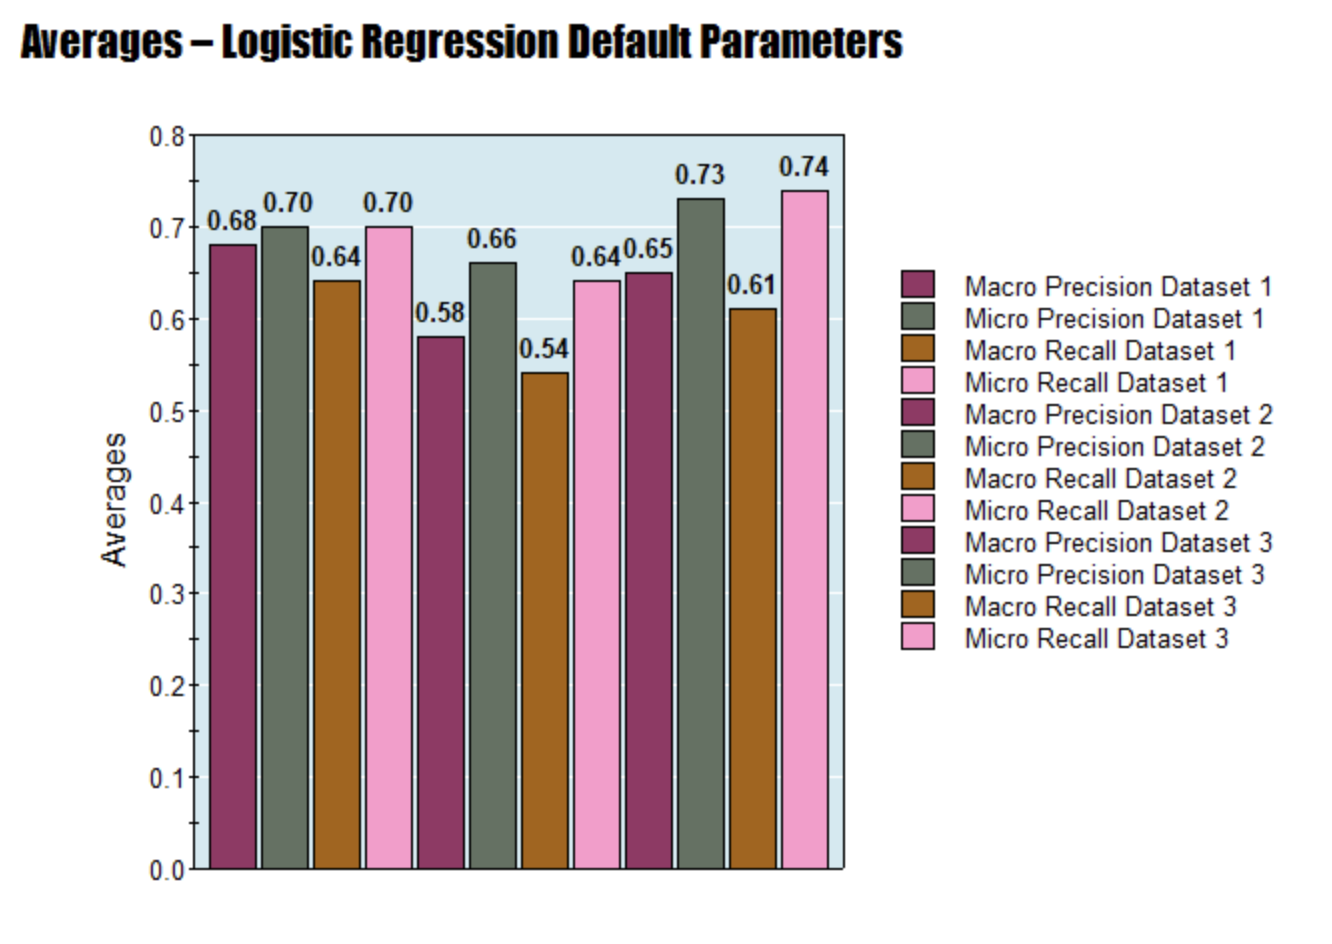



As mentioned previously, this dataset 1 has the highest performance in both precision and recall among LR models as it has better consistency all around. Dataset 2 has a lower performance, especially in macro averages, which means it has difficulties in handling class imbalance or specific class characteristics in this dataset (in this case handling the verb classification). Dataset 3 has a performance compared to D2LR and D1LR, particularly in micro averages, indicating better overall accuracy but still issues with certain classes with the noticeably low macro averages.

Comparing macro/micro precision/recall averages for Multilater Perceptron (MLP) using the default parameter vs logistic sigmoid function vs modified hidden layer for dataset 1 (original dataset).

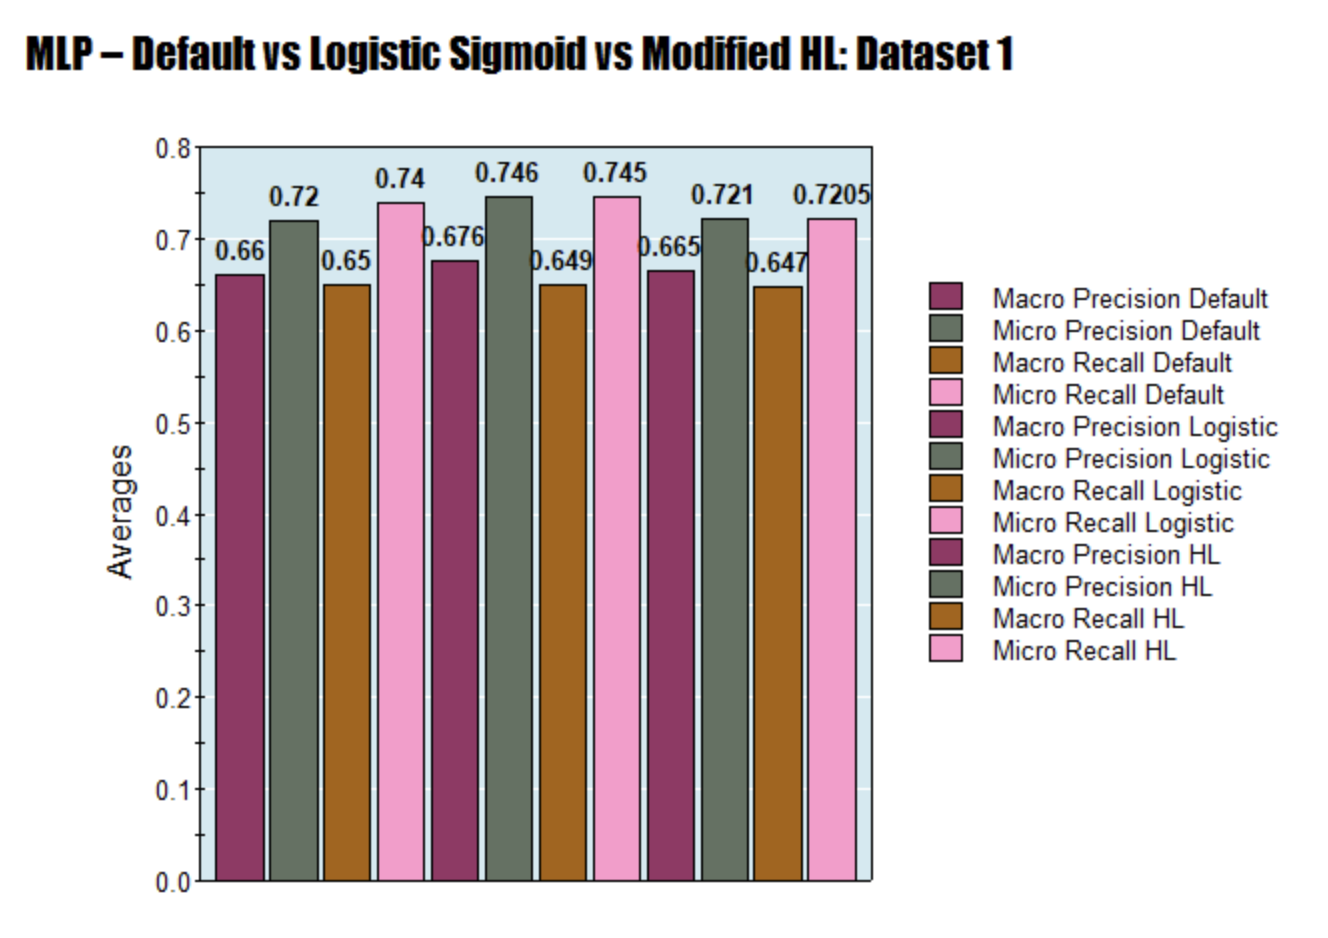

In dataset 1, the default MLP model (D1MLP) shows slightly lower macro averages but higher micro averages when compared to logistic regression (D1LR). The MLP with the logistic sigmoid function (D1MLPAF) performs even better, in micro averages, indicating that the sigmoid function might be more aligned with the needs of our dataset. However, the MLP with a modified hidden layer configuration (D1MLPHL) has a performance similar to D1MLP, with just a slight decrease in averages, which isn't very significant.

This is evident in D1MLPAF, which shows improved outcomes in both macro and micro precision and recall over the default D1MLP. This suggests that the sigmoid function more effectively handles class probabilities in Dataset 1.

In contrast, the alterations in the hidden layers, while a balanced choice for many datasets, do not show a substantial impact on performance. It appears that these specific modifications in D1MLPHL might not have been optimal or necessary, as indicated by the tiny improvement in classification accuracy. This implies that the complexity added by modifying the hidden layers does not necessarily translate into better performance for original dataset 1.

Comparing macro/micro precision/recall averages for Multilater Perceptron (MLP) using the default parameter vs logistic sigmoid function vs modified hidden layer for dataset 2 (verb dataset).

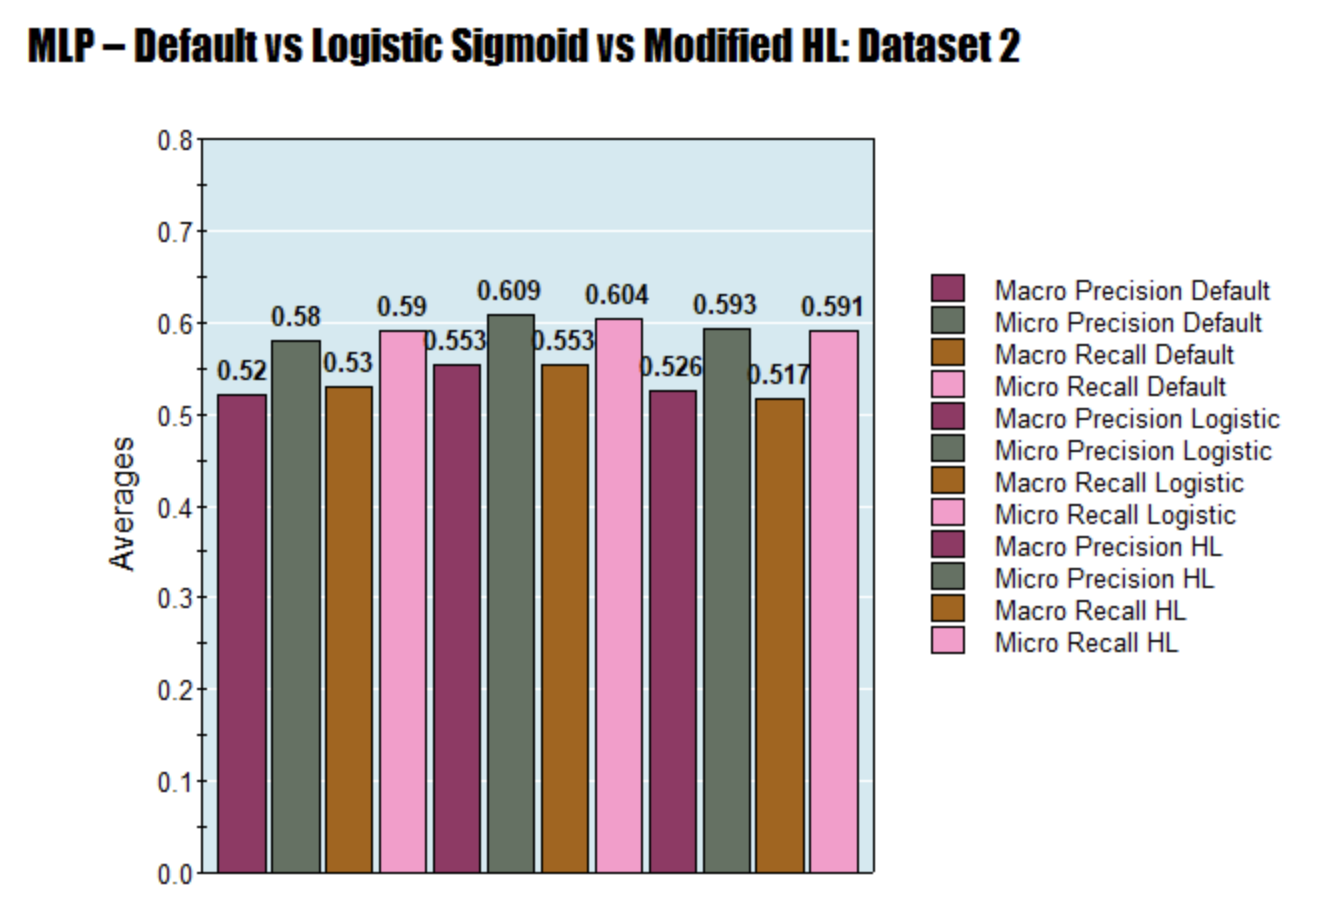

Switching our focus to dataset 2, where verbs are classified, we notice that D2MLP with its default settings shows a weak performance across all models. It seems to have a hard time getting verb classification right. When we switch up the activation layer, there's a bit of an improvement over D2MLP, yet the model still faces challenges with this dataset. And, while precision sees a slight boost, the recall actually drops a bit compared to D2MLP. But for the hidden layer, it has the overall weakest performance, but still having the same jump and dips in recall and precision.

With the logistic sigmoid function in D2MLPAF, there's a noticeable improvement in micro averages, pointing to better overall performance in classifying, particularly for the more common classes. On the other hand, changing the hidden layer configuration in D2MLPHL results in performance that's pretty similar to the standard MLP model, just with some small ups and downs in precision and recall.

Comparing macro/micro precision/recall averages for Multilater Perceptron (MLP) using the default parameter vs logistic sigmoid function vs modified hidden layer for dataset 3 (adjectives and adverb dataset).

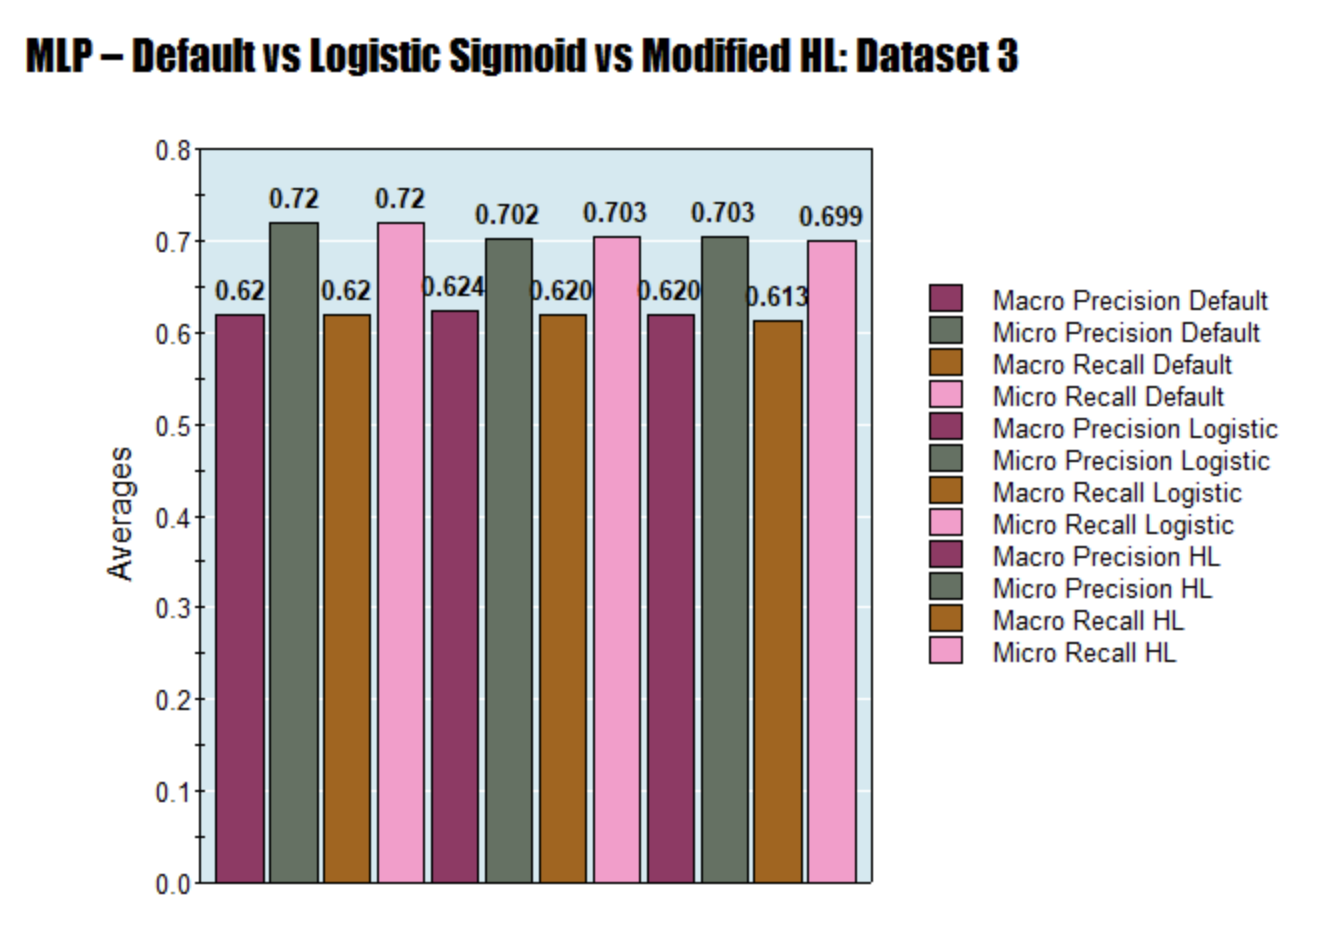

Diving into Dataset 3, which sorts out the adjectives and adverbs, we see that the default settings are doing pretty well, especially when it comes to micro averages, much like what we saw with D3LR. With the logistic sigmoid function, the results are pretty close to the default ones, both in macro and micro averages. And when we tweak the hidden layers, the performance is also similar to D3MLP, but with just a slight dip in both micro and macro averages.

There's a bit of an uptick in macro precision with the default setup, showing a small but positive effect on managing class imbalances. However, the micro averages are pretty much on par, hinting that we're not fully nailing the overall accuracy across all classes. When we mess with the hidden layers, there's a small drop in precision and recall, both in macro and micro terms. This suggests that modifying the hidden layers and activation function didn't really boost the model's capability to capture the finer details of this dataset.

*Conclusive Comparative Observations*

When we tweak the MLP models, using the sigmoid function seems to do a better job with class probabilities and overall accuracy, which really shows in the micro averages. Changing up the hidden layers doesn't make a big difference from the standard parameter. This suggests that messing with the hidden layers might not be necessary for the airline passenger review datasets - they don't really need that extra layer of complexity.

Looking at the datasets more generally, dataset 1 works well with pretty much all the models, and the MLP with the changed activation layer does a bit better in micro-average performance. Dataset 2, on the other hand, is a tougher - it consistently scores lower, especially in the macro averages, hinting at some tricky class imbalance or unique traits in the data. Dataset 3, with the modified hidden layer, performs well across the board, especially in micro averages, pointing to a well-rounded dataset with a good mix of classes.

Overall, seeing how different models perform on various datasets really drives home the point about the need to pick the right model and adjust its settings for each dataset's unique needs. The struggles with dataset 2 mean we should probably look for new ways to handle it. Generally, micro averages tend to be higher, suggesting models are better at handling the more common classes, which is what you often see with imbalanced datasets. And, the sigmoid function in the MLPAF models seems like it might be a better fit for our airline passenger review dataset.

**References**

https://github.com/baharin/CSI4106-Assignment4-Datasets/blob/main/reduced_file_AirPassengerReviews.csv

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

https://stackoverflow.com/questions/67198997/how-change-learnrate-and-hidden-layers-of-a-mlp-network-with-sklearn

https://datascience.stackexchange.com/questions/92867/do-larger-numbers-of-hidden-layers-have-a-bigger-effect-on-a-classification-mode#:~:text=Changing%20the%20number%20of%20hidden,the%20case%20of%20Dense%20layers%20

https://datascience.stackexchange.com/questions/22199/what-are-the-default-values-of-nodes-and-internal-layers-in-neural-network-model

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

https://scikit-learn.org/stable/modules/neural_networks_supervised.html